# Introduction

Are you a job seeker who has wandered around so much trying to find a way to break into the information technology field? The good news is that you are not alone and fortunately we have the data to help you make informed decision.

In this notebook, we will use datasets featuring the results of a Stack Overflow survey of software developers from 2017 to find answers to some real-world application questions I find even personal. 

The data is made up of two files:

- survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer

- survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name

Although this survey pertains to software developers, but I believe it can be applicable to any tech jobs like Data Science, Artificial Intelligence, Blockchain Development, to name a few. I hope that the results in this notebook satisfies your curosity and helps you make informed decision afterwards.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from collections import defaultdict 
%matplotlib inline

In [2]:
#load data
df_survey = pd.read_csv('survey-results-public.csv')
df_schema = pd.read_csv('survey-results-schema.csv')

### Descriptive Statistics

In [3]:
# print number rows x and columns y in the data in the format (x, y)
df_survey.shape

(51392, 154)

In [4]:
df_survey.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [5]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)
df_schema.head(2)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?


The respondent dataset has 154 features and 51392 observations. We will break into this datasets by posing different questions. But before then we will define functions that will help us later in our analysis.

In [6]:
def num_missing_value(df, col):
    """
    Counts the number of missing values in a column
    
    INPUT: 
          dataframe df, column of interest col
    OUTPUT:
          number of missing values in col.
    """
    return df[col].isnull().sum()

In [7]:
def print_question(col):
    """ A function to print the question corresponding to a given column in schema dataframe
    """
    return list(df_schema[df_schema.Column == col]['Question']) 

In [8]:
def df_filter(df, col, val):
    """Filters a dataframe
    
    INPUT:
         df - a pandas dataframe holding the columns you want to filter
         col: Coulmn
         val: how you want to filter the column in the dataframe
    """
    new_df = df[df[col] == val]
    return new_df

In [9]:
def value_count_plot(df, col, title, x ='Proportion',plot=True):
    """
    INPUT 
        df - a pandas dataframe holding the columns you want to plot
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the EducationTypes column.
    """
    count_prop = (df[col].value_counts())/df.shape[0]

    #plot the proportion of the column counts above
    if plot:
        plt.figure(figsize = [6, 5])
        count_prop.sort_values().plot(kind="barh", width = 0.7);
        plt.title(title);
        plt.xticks(fontsize=12);
        plt.yticks(fontsize=12);
        plt.xlabel(x)
        plt.show();
    return count_prop
    

## Part 1: What qualifications do I need to become a professional software developer?

Let us explore the qualifications of only the `professional developers` in the dataset

### Univariate Analysis

### Professionals

In [10]:
print_question('Professional')

['Which of the following best describes you?']

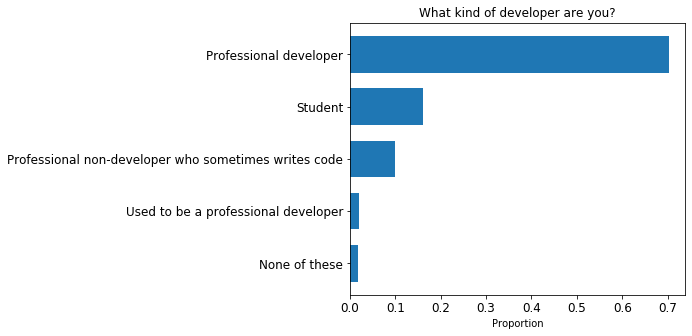

Professional developer                                  0.703047
Student                                                 0.160025
Professional non-developer who sometimes writes code    0.100016
Used to be a professional developer                     0.019127
None of these                                           0.017785
Name: Professional, dtype: float64

In [11]:
value_count_plot(df_survey,"Professional","What kind of developer are you?")

**Comment**

70.3% of respondents are professional developers while 1.9% used to be a professional developed. We will narrow our dataset to include only these categories.

In [12]:
#filter dataframe df_curvey
df = df_survey[(df_survey['Professional'] == "Professional developer") | (df_survey['Professional'] ==  "Used to be a professional developer")]
df['Professional'].value_counts()

Professional developer                 36131
Used to be a professional developer      983
Name: Professional, dtype: int64

In [13]:
print('There are {} missing values in the Professional column'.format(num_missing_value(df,'Professional')))

There are 0 missing values in the Professional column


**Comment**

So we have our filtered dataframe df with no missing values to work with through out this notebook.

### Formal Education

Here we will explore the formal education of all professional developers

In [14]:
print_question('FormalEducation')

["Which of the following best describes the highest level of formal education that you've completed?"]

In [15]:
num_missing_value(df,'FormalEducation')

0

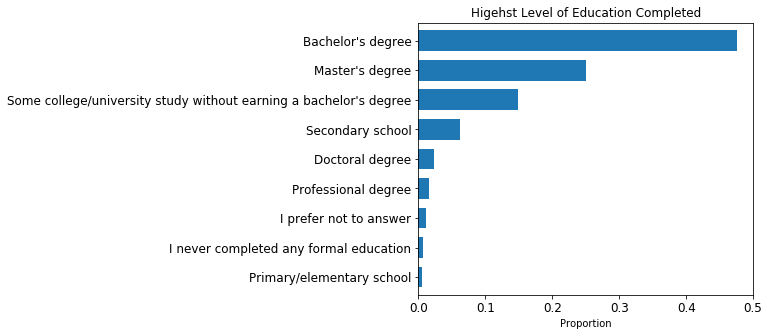

Bachelor's degree                                                    0.476424
Master's degree                                                      0.250148
Some college/university study without earning a bachelor's degree    0.149108
Secondary school                                                     0.062726
Doctoral degree                                                      0.022525
Professional degree                                                  0.015089
I prefer not to answer                                               0.010912
I never completed any formal education                               0.007302
Primary/elementary school                                            0.005766
Name: FormalEducation, dtype: float64

In [16]:
value_count_plot(df,"FormalEducation","Higehst Level of Education Completed")

About 48% of respondents have Bachelors degree, 25% have Master's degree while only 2% have Doctoral degree. So a graduate degree is not necessary to break into the field of professional software development. But an interesting question we would explore is how satisfied are those with qualifications higher than BSc in their jobs compared to those with BSc degrees and lower?

Before then, let us explore the main field of study for the undergraduate studies.

### Undergraduate Majors

In [17]:
print_question('MajorUndergrad')

["Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?"]

In [18]:
num_missing_value(df,'MajorUndergrad')

3259

**Comment**

So we see there are 3259 missing values in the MajorUndergrad column. These are likely coming from respondents who reported formal education such as secondary school, I prefer not to answer, Primary/elementary school, I never completed any formal education, Some college/university study without earning a bachelor's degree respectively. Since our goal for now is to understand the descriptive statistics of our dataset, we will not worry about the missing values.

For the purpose of machine learning we would have to drop these missing values.

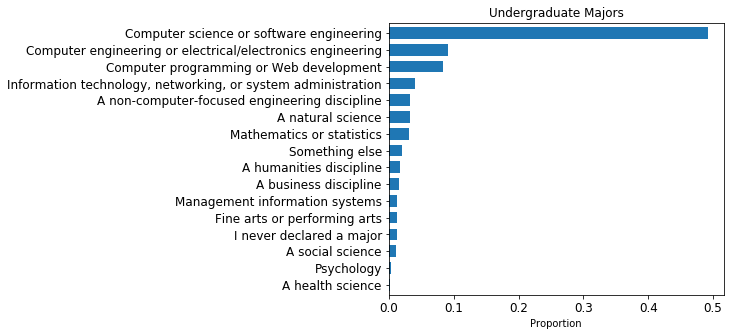

Computer science or software engineering                        0.491755
Computer engineering or electrical/electronics engineering      0.091825
Computer programming or Web development                         0.082853
Information technology, networking, or system administration    0.039796
A non-computer-focused engineering discipline                   0.033276
A natural science                                               0.032656
Mathematics or statistics                                       0.031740
Something else                                                  0.019561
A humanities discipline                                         0.017406
A business discipline                                           0.015762
Management information systems                                  0.013283
Fine arts or performing arts                                    0.013041
I never declared a major                                        0.011963
A social science                                   

In [19]:
value_count_plot(df,"MajorUndergrad","Undergraduate Majors")

There is a clear difference in the figure above. 49% of the respondents majored in Computer Science or Software Engineering in their undergraduate studies; while the rest percentage is split accross 15 disciplines.

Interestingly, there are other types of education most respondats did outside their formal schooling and education. Let us explore this for developers without computer science or software engineering major.

### Other Form of Education

In [20]:
print_question('EducationTypes')

['Outside of your formal schooling and education, which of the following have you done?']

In [21]:
value_count_plot(df,"EducationTypes","Proportion of Other Education Types", plot=False).head(10)

Self-taught                                                                   0.066821
On-the-job training; Self-taught                                              0.038880
Self-taught; Open source contributions                                        0.035485
Online course; Self-taught                                                    0.029611
Online course; On-the-job training; Self-taught                               0.028372
On-the-job training; Self-taught; Open source contributions                   0.018969
Online course; Self-taught; Open source contributions                         0.015816
Self-taught; Hackathon; Open source contributions                             0.012125
Online course; On-the-job training; Self-taught; Open source contributions    0.011451
Self-taught; Hackathon                                                        0.008649
Name: EducationTypes, dtype: float64

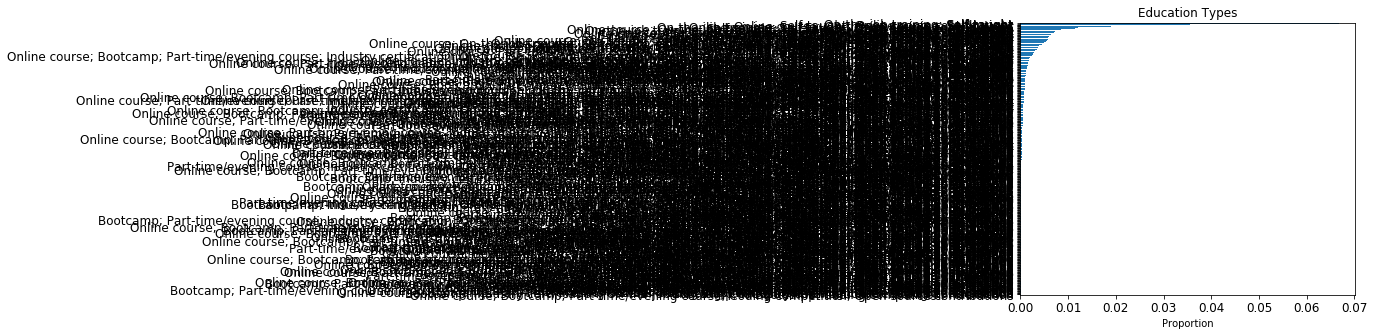

In [22]:
EduTyp=value_count_plot(df,"EducationTypes","Education Types")

**Comment**: 
Looks like the EducationTypes column is messy.

Most respondents have mentioned more than one education types and that made things pretty messy. So possible education types as we can see include:

Self-taught, Online courses, participating in open source contributions, On-the-job training, Hackathon, Coding competition, Part-time/evening course, Industry certification, and Bootcamp. 

We will extract each of the education types and count the number of times mentioned in the dataset.


In [23]:
#credit to this code goes to Udacity course material on Data Science Process.

# a function to search for an item in the row of a dataframe and count its number of occurrencies
def total_count(df, col1, col2, var_list):
    """
    INPUT:
    df - pandas dataframe containing columns col1 and col2
    col1 - column with strings we want to search
    col2 - column to count values
    var_list - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    df_new - a dataframe of each var_list with the count of its ocurrences
    """
    df_new = defaultdict(int)
    for item in var_list: #loop through list of strings
        for i in range(df.shape[0]): #loop through list of column
            if item in df[col1][i]: 
                df_new[item] += int(df[col2][i])
    df_new = pd.DataFrame(pd.Series(df_new)).reset_index()
    df_new.columns = [col1, col2]
    df_new.sort_values(col2, ascending=False, inplace=True)
    return df_new

In [24]:
def prop_plot(df,col2,possible_vals):
    vals= df[col2].value_counts().reset_index()
#val_ncs= df_ncs[col2].value_counts().reset_index()
    df_prop=total_count(vals, 'index', col2, possible_vals)
#edu_type_ncs=total_count(val_ncs, col1, col2, possible_vals)

    df_prop['perc'] = df_prop[col2]/np.sum(df_prop[col2])

    df_prop.columns = [col2, 'count', 'proportion']
    
    return df_prop
    

In [25]:
#function to plot a horizontal bar chat of two columns in a dataframe
def bar_plot(df,x,y,xlabel,title):
    ax = df[[x, y]].plot(kind='barh', yticks = df.index, width=0.7, figsize=(12, 6),legend=None);
    ax.set_yticklabels(df[x]);
    ax.set_xlabel(xlabel)
    ax.grid(axis = 'x',linestyle = '--', linewidth = 0.5)
    plt.title(title);

#### Revisiting education type column

In [26]:
possible_vals = ['Self-taught', 'Online course', 'Open source contributions', 'On-the-job training', 'Hackathon', 
                   'Coding competition', 'Part-time/evening course', 'Industry certification','Bootcamp']


edu_types = prop_plot(df,'EducationTypes', possible_vals)
edu_types

,EducationTypes,count,proportion
0,Self-taught,20935,0.294155
3,On-the-job training,10749,0.151033
1,Online course,10164,0.142813
2,Open source contributions,8979,0.126163
4,Hackathon,5805,0.081565
5,Coding competition,4988,0.070086
7,Industry certification,3822,0.053702
6,Part-time/evening course,3522,0.049487
8,Bootcamp,2206,0.030996


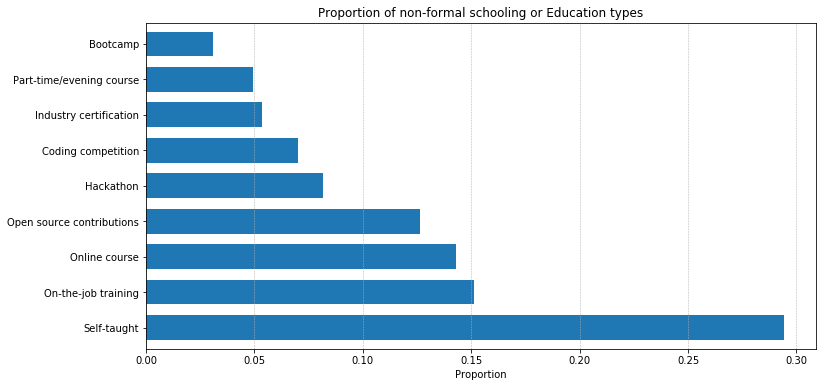

In [27]:
bar_plot(edu_types,'EducationTypes', 'proportion','Proportion','Proportion of non-formal schooling or Education types')

**Comment**

So here we see a huge gap; other than the formal education, developers have had to teach themselves more to become professionals in the field. The least non-formal education is bootcamp. This could be attributed to the high cost assoicated with going into bootcamps, or the difficulties as you dont study at your own favourable time. 

Let us take a look at what resources they used for the self education. 

### Self Taught Types

In [28]:
print_question('SelfTaughtTypes')

["You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so."]

In [29]:
value_count_plot(df,"SelfTaughtTypes","Proportion of Other Education Types", plot=False).head(5)

Official documentation; Trade book; Stack Overflow Q&A                                                 0.022902
Official documentation; Stack Overflow Q&A                                                             0.020100
Official documentation; Trade book; Stack Overflow Q&A; Built-in help                                  0.017837
Official documentation; Stack Overflow Q&A; Non-Stack online communities; Built-in help                0.017729
Official documentation; Trade book; Stack Overflow Q&A; Non-Stack online communities; Built-in help    0.017648
Name: SelfTaughtTypes, dtype: float64

In [30]:
possible_vals = ['Official documentation','Stack Overflow Q&A','Trade book','Non-Stack online communities', 'Built-in help',
                'Stack Overflow Docs','Friends network','Textbook','Company internal community','Other',
                'Tutoring/mentoring', ]


self_edu_type=prop_plot(df,'SelfTaughtTypes', possible_vals)
self_edu_type

,SelfTaughtTypes,count,proportion
0,Official documentation,16876,0.197322
1,Stack Overflow Q&A,16380,0.191523
2,Trade book,11604,0.135680
3,Non-Stack online communities,10383,0.121403
4,Built-in help,9826,0.114890
5,Stack Overflow Docs,5352,0.062578
6,Friends network,4168,0.048734
7,Textbook,4073,0.047624
8,Company internal community,3765,0.044022
9,Other,2219,0.025946


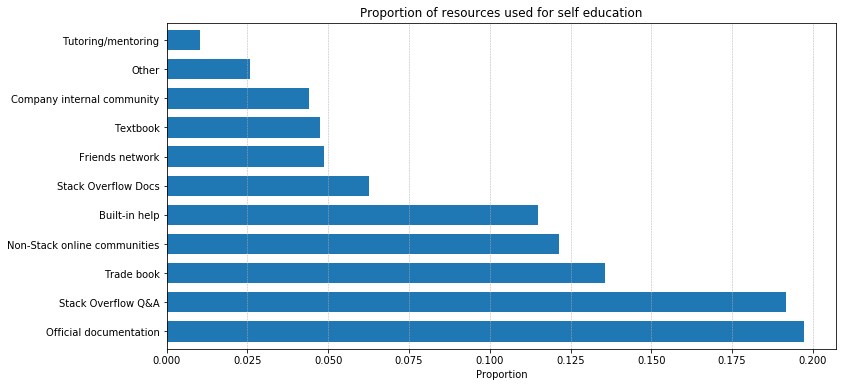

In [31]:
bar_plot(self_edu_type,'SelfTaughtTypes', 'proportion','Proportion','Proportion of resources used for self education')

**Comment**

So official documentation and stack overflow q&a are useful resources if you want to teach your self how to become a software developer. 

### Summary

So far we have looked at formal education levels of professional developers. We observed that a larger proportion of them had bachelors degree and others a Master's degree. Next we looked at their majors at undergraduate and also observed that computer science or software engineering seems to be the most common major.

On the other hand, we saw that there are other types of education one could acquire in order to break into the field of software development. These include Self Education, bootcamps, Online courses etc. 

Self education turned out to be the most common type of education other than formal schooling or education. We could attribute this to many reasons but the obvious been that you set your own pace and learn at your own comfort. And we saw that developers engaging in self education mainly use official documentations and satck Overflow Q&A for their purpose. 

Similarly, the less common type of education is bootcamp. In my opinion, I would say this is less common because of the high cost of going into bootcamp. And also because of the difficulty of attending a bootcamp. We will find out later in this note book whether it is worth attending a bootcamp or not.


### Bivariate Analysis

In this section, we want to look at relationship between variables.

#### Education Types vs Undergraduate Majors

Did developers with computer science or software engineering majors at undergraduate partake in any other form of education or not? How about those with out the computer science or engineerig majors? 

One might expect that those with no computer science or software engineering majors should 

In [32]:
#filter data for only those with computer science or software engineering majors
df_cs = df[df['MajorUndergrad'] == "Computer science or software engineering"]
df_ncs = df[df['MajorUndergrad'] != "Computer science or software engineering"]

In [33]:
#automating

def bivariate_prop(df1,df2,col,col_x,possible_vals):
    val_1= df1[col].value_counts().reset_index()
    val_2= df2[col].value_counts().reset_index()

    df_1 = total_count(val_1, 'index', col, possible_vals)
    df_2 = total_count(val_2, 'index', col, possible_vals)

    df_1['proportion'] = df_1[col]/np.sum(df_1[col])

    df_1.columns =  [col, 'count', 'proportion']

    df_2['propportion'] = df_2[col]/np.sum(df_2[col])
    df_2.columns =  [col, 'count', 'proportion']

    #merge the two dataframe
    comp_df = pd.merge(df_1, df_2, left_index=True, right_index=True)
    #take the difference in proportion
    comp_df['diff_prop'] = comp_df['proportion_x'] - comp_df['proportion_y']
    #select columns in comp_df table
    comp_df = comp_df.loc[:,[col_x,'proportion_x','proportion_y','diff_prop']]
    #rename columns
    comp_df.columns = [col, 'prop_cs', 'prop_ncs', 'diff_prop']
    comp_df = comp_df.sort_values(by=['diff_prop'],ascending=False)
    return comp_df
    

In [34]:
possible_vals = ['Self-taught', 'Online course', 'Open source contributions', 'On-the-job training', 'Hackathon', 
                   'Coding competition', 'Part-time/evening course', 'Industry certification','Bootcamp']

df_maj_edu = bivariate_prop(df_cs,df_ncs,'EducationTypes','EducationTypes_x', possible_vals)
df_maj_edu

,EducationTypes,prop_cs,prop_ncs,diff_prop
5,Coding competition,0.079157,0.061058,0.018099
4,Hackathon,0.090284,0.072888,0.017396
7,Industry certification,0.055861,0.051554,0.004306
2,Open source contributions,0.125750,0.126573,-0.000823
3,On-the-job training,0.149835,0.152224,-0.002389
8,Bootcamp,0.026930,0.035042,-0.008112
1,Online course,0.138680,0.146926,-0.008246
6,Part-time/evening course,0.044649,0.054302,-0.009653
0,Self-taught,0.288853,0.299431,-0.010578


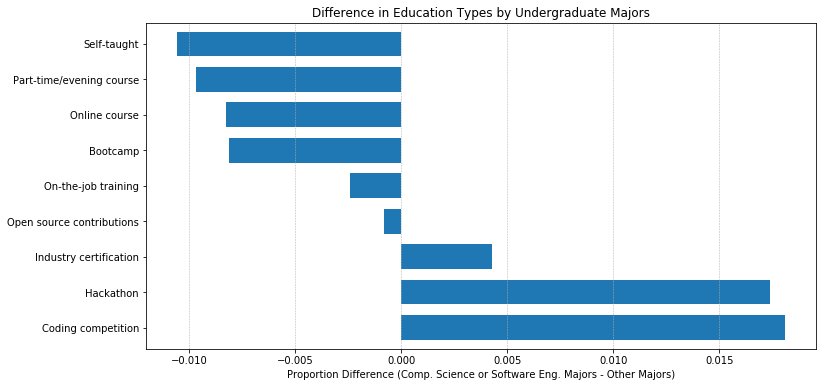

In [35]:
bar_plot(df_maj_edu,'EducationTypes', 'diff_prop','Proportion Difference (Comp. Science or Software Eng. Majors - Other Majors)',"Difference in Education Types by Undergraduate Majors")

**Comment**

So as we explored in the `EducationTypes` section, we saw that self-education is the most common informal education asides a developer's formal school or education. 

In the figure above, we have compared this trend for developers with mahjor in computer science or software engineering; 

- We can see that computer science or software engineering majors have participated more in coding competion (almost 2%) and Hackathon (1%) more than those withno computer science or software engineering major at undergraduate. On the otherhand, those who do not have computer science or software engineering as their major are more inclined to self-education (1%) more than those with the major. 

- The other differences observed between those with computer science or software engineering majors are negligible. None of them even reaching a 1% difference. This illustrates the bias individuals have towards obtaining other forms of education asides their formal education.


We might want to take this one step further and say we care more about the education types done by non computer science or software engineering undergraduate majors. Could there be a dependence on the level of education one must have acquired. Let's take a stab at incorporating that into this analysis.

#### Formal Education vs Education Types

We saw in our analysis above that there is a bias between developers undergraduate majors and their other forms of education asides their formal schooling or education. Our interest here is to see if this bias could be attributed to levels of formal education.

In [36]:
# a function to creat dummy variables for formal education column 
def higher_edu(formal_ed_str):
    """
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is in ("Doctoral degree", Master's degree", "Professional degree")
        return 0 otherwise
    
    """
    if formal_ed_str in ("Doctoral degree", "Master's degree", "Professional degree"):
        return 1
    else:
        return 0

In [37]:
possible_vals = ['Self-taught', 'Online course', 'Open source contributions', 'On-the-job training', 'Hackathon', 
                   'Coding competition', 'Part-time/evening course', 'Industry certification','Bootcamp']

#apply the higher_edu function to df_ncs dataframe
df_ncs['HigherEdu'] = df_ncs["FormalEducation"].apply(higher_edu) #engineering a new feature HigerEdu as defined above

edu_1 = df_ncs[df_ncs['HigherEdu'] == 1] # Subset df to only those with HigherEdu of 1
edu_0 = df_ncs[df_ncs['HigherEdu'] == 0] # Subset df to only those with HigherEdu of 0


df_form_edu = bivariate_prop(edu_1,edu_0,'EducationTypes','EducationTypes_x',possible_vals)
df_form_edu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,EducationTypes,prop_cs,prop_ncs,diff_prop
1,Online course,0.153878,0.144345,0.009533
5,Coding competition,0.065341,0.059468,0.005873
0,Self-taught,0.301854,0.298532,0.003322
7,Industry certification,0.053019,0.051011,0.002008
6,Part-time/evening course,0.055400,0.053894,0.001506
8,Bootcamp,0.034379,0.035289,-0.000909
3,On-the-job training,0.147976,0.153802,-0.005826
2,Open source contributions,0.121259,0.128546,-0.007287
4,Hackathon,0.066894,0.075113,-0.008219


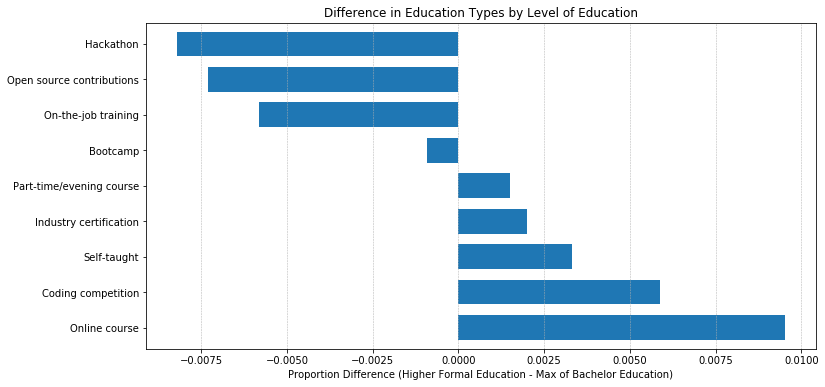

In [38]:
bar_plot(df_form_edu,'EducationTypes', 'diff_prop','Proportion Difference (Higher Formal Education - Max of Bachelor Education)',"Difference in Education Types by Level of Education")

**Comment**

- The figure above shows the proportion of different non-formal schooling or education for developers with non computer science or software engineering majors at undergraduate versus level of education.


- Here, we can see signficant difference; those who have earned one of these higher degrees took more online courses and participated in coding competing, while those with maximum of bachelor's degree participated in Hackathon, Open source contributions and on the job training. 

- The other differences observed between those with higher formal education and everyone else are negligible. Although the difference observed for bootcamp is negligible (<1%), we see that those with maximum of bachelor's degree tend to go into bootcamps more than those with higher formal education. 


### Summary

So far we have looked at formal education levels of professional developers. We observed that a larger proportion of them had bachelors degree and others a Master's degree. Next we looked at their majors at undergraduate and also observed that computer science or software engineering seems to be the most common major.

On the other hand, we saw that there are other types of education one could acquire in order to break into the field of software development. These include Self Education, bootcamps, Online courses etc. 

Self education turned out to be the most common type of education other than formal schooling or education. We could attribute this to many reasons but the obvious been that you set your own pace and learn at your own comfort. And we saw that developers engaging in self education mainly use official documentations and satck Overflow Q&A for their purpose. 

Similarly, the less common type of education is bootcamp. In my opinion, I would say this is less common because of the high cost of going into bootcamp. And also because of the difficulty of attending a bootcamp. We will find out later in this note book whether it is worth attending a bootcamp or not.



## Part 2: How can a novice switch to a career as a software developer?

By novice, we mean individuals who do not have a degree in a field related to computer programming and who has work experience in non-coding jobs. In order to understand how to break into the field of software development, we will look at the CousinEducation field. 

In [39]:
print_question('CousinEducation')

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [40]:
df['CousinEducation'].value_counts().reset_index().head()

,index,CousinEducation
0,Take online courses; Buy books and work through the exercises,519
1,Take online courses,377
2,Take online courses; Part-time/evening courses; Buy books and work through the exercises,363
3,Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises,354
4,None of these,343


In [41]:
# Here is a list of the different answers provided
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

df_cous_edu = prop_plot(df,'CousinEducation', possible_vals)
df_cous_edu

,CousinEducation,count,proportion
0,Take online courses,11250,0.207102
1,Buy books and work through the exercises,8772,0.161485
3,Part-time/evening courses,5630,0.103643
5,Contribute to open source,5565,0.102447
6,Conferences/meet-ups,4108,0.075625
7,Bootcamp,3984,0.073342
4,Return to college,3679,0.067727
8,Get a job as a QA tester,2758,0.050772
9,Participate in online coding competitions,2452,0.045139
11,Participate in hackathons,1952,0.035935


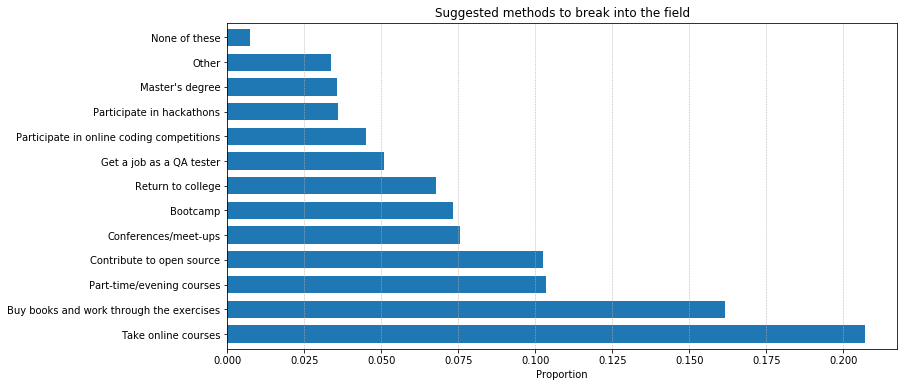

In [42]:
bar_plot(df_cous_edu,'CousinEducation', 'proportion','Proportion','Suggested methods to break into the field')

Taking online courses, buying books and working through the exercises is the highest suggestion to break into the field. 

### Is there a bias in terms of formal education?

In [43]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]



df_cous_bi=bivariate_prop(edu_1,edu_0,'CousinEducation','CousinEducation_x',possible_vals)
df_cous_bi=df_cous_bi.sort_values(by=['diff_prop'],ascending=False)
df_cous_bi

,CousinEducation,prop_cs,prop_ncs,diff_prop
10,Master's degree,0.056584,0.020876,0.035708
4,Return to college,0.057509,0.051086,0.006423
8,Get a job as a QA tester,0.050502,0.049079,0.001423
2,None of these,0.008726,0.008079,0.000646
7,Bootcamp,0.072581,0.073117,-0.000536
9,Participate in online coding competitions,0.042173,0.042907,-0.000733
3,Part-time/evening courses,0.101005,0.103227,-0.002222
0,Take online courses,0.206901,0.209665,-0.002764
5,Contribute to open source,0.102459,0.106639,-0.004180
1,Buy books and work through the exercises,0.166843,0.171677,-0.004834


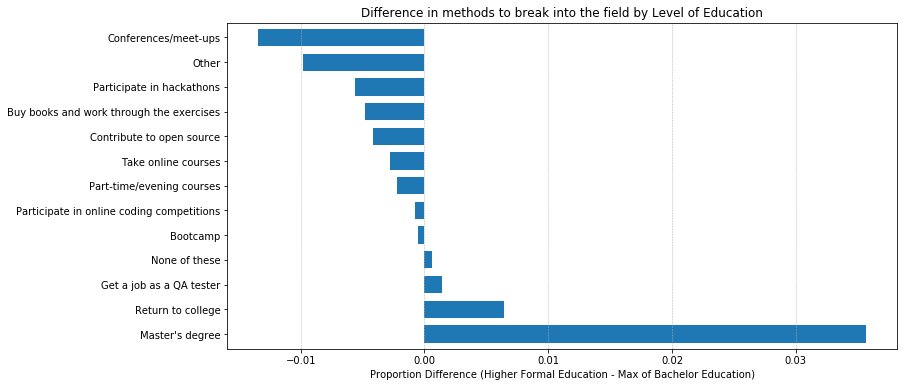

In [61]:
bar_plot(df_cous_bi,'CousinEducation', 'diff_prop','Proportion Difference (Higher Formal Education - Max of Bachelor Education)',"Difference in methods to break into the field by Level of Education")

### Comment

- Here, we can see that those who have earned one of these higher degrees propose getting a Master’s Degrees as a method to break into the field >3% more than those who did not attain a higher formal degree. While those with maximm of bachelor's degree suggest atteding conferences/meet-ups (>1%) more than those with higher formal education.

- The other differences observed between those with higher formal education and everyone else are negligible with <1% difference. This illustrates the bias individuals have towards suggesting others to enter the field in the same way they did.


## Part 3: Who is more likely to attend a bootcamp?

Let us look at what the data suggests about graduates of bootcamps, in termsof participation. In the inferential statistics [notebook](http://localhost:8889/notebooks/Inferential_Statistics.ipynb), we are going to make conclusions on the benefit of bootcamp interms of job satisfacton.


In [45]:
print_question('TimeAfterBootcamp')

['You indicated previously that you went through a developer “bootcamp.” How long did it take you to get a full-time job as a developer after graduating?']

In [46]:
#print number of missing values in the TimeAfterBootcamp column
num_missing_value(df,'TimeAfterBootcamp')

34996

It is sufficient to assume that the missing values in this column are coming from those that didnt attend bootcamps. We are interested in only those that attended bootcamps so let us filterthe data set.

In [47]:
bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True]

print("Number of non bootcamp graduates is {}".format(not_bootcamp_df.shape[0]))
print("Number of bootcamp graduates is {}".format(bootcamp_df.shape[0]))

Number of non bootcamp graduates is 34996
Number of bootcamp graduates is 2118


So there are 2118 of the bootcamp graduates. 

#### Who is more likely to attend bootcamp? Those with maximum of bachelors degree or higher formal education?

In [48]:
bootcamp_df['FormalEducation'].value_counts()/bootcamp_df.shape[0] 

Bachelor's degree                                                    0.491974
Master's degree                                                      0.242210
Some college/university study without earning a bachelor's degree    0.154391
Secondary school                                                     0.051464
Doctoral degree                                                      0.019358
Professional degree                                                  0.017469
I prefer not to answer                                               0.008971
I never completed any formal education                               0.008026
Primary/elementary school                                            0.006138
Name: FormalEducation, dtype: float64

So about 49% had bachelors before going into bootcamps. 24% had master's degree, 2% had doctoral degree and Professional degree. 

Let's see these proportions for non-bootcamp graduates.


In [49]:
(0.063407- 0.051464)*100

1.1943000000000001

In [50]:
not_bootcamp_df['FormalEducation'].value_counts()/not_bootcamp_df.shape[0] 

Bachelor's degree                                                    0.475483
Master's degree                                                      0.250629
Some college/university study without earning a bachelor's degree    0.148788
Secondary school                                                     0.063407
Doctoral degree                                                      0.022717
Professional degree                                                  0.014945
I prefer not to answer                                               0.011030
I never completed any formal education                               0.007258
Primary/elementary school                                            0.005744
Name: FormalEducation, dtype: float64

- So we have 47.5% of bachelor degree holders who are non-bootcamp graduates, about 1.5% less than botcamp graduates. After a bachelors, people are choosing other professional education.

- The proportion of those with higher formal education (Master's and Ph.D) and secondary school holders who are non-bootcamp graduates is more  than the bootcamp graduates while same have other degrees like those in bootcamp. 

### Summary

Most developers with higher formal education would opt for the option of self-education or taking online courses than going to bootcamp unlike those with bachelors. Important to note is that online courses and self education need discipline, probably while we see the trend above.

Let us now dive into job satisaction

## Part 4: As a professional developer, are you satisfied with your job?

Which categories of developers are more satisfied with their job? Those with higher education? Working remotely from home? Or those who program fr hubby?

In [51]:
print_question('JobSatisfaction')

['Job satisfaction rating']

We are interested in those individuals with job satisfaction rating. So we will filter our data set to include these ones.

In [52]:
jobsat_df = df[df['JobSatisfaction'].isnull()==False]
#test
jobsat_df['JobSatisfaction'].isnull().any()

False

#### FormalEducation vs JobSatisfaction

A friend says a Doctoral degree increases the chance of having job you like, does this seem true?



In [53]:
#'According to FormalEducation, which group has the highest average job satisfaction?'
jobsat_df.groupby('FormalEducation')['JobSatisfaction'].mean().sort_values(ascending=False).reset_index()

,FormalEducation,JobSatisfaction
0,Doctoral degree,7.373283
1,Secondary school,7.214741
2,Some college/university study without earning a bachelor's degree,7.149803
3,Professional degree,7.125940
4,I prefer not to answer,7.079208
5,Primary/elementary school,7.058201
6,Master's degree,6.978011
7,Bachelor's degree,6.918374
8,I never completed any formal education,6.889796


It turns out that those with a Ph.D. degree has the highest job satisfaction while those who never completed any formal education has the least job satisfaction on average.

#### ProgramHobby vs JobSatisfaction

In [54]:
(7.076505 - 6.969042)*100

10.746300000000009

In [55]:
print_question('ProgramHobby')

['Do you program as a hobby or contribute to open source projects?']

In [56]:
#'Do individuals who program outside of work appear to have higher JobSatisfaction?'
df.groupby('ProgramHobby')['JobSatisfaction'].mean().sort_values(ascending=False)

ProgramHobby
Yes, both                                    7.146069
Yes, I contribute to open source projects    7.076505
Yes, I program as a hobby                    6.969042
No                                           6.859012
Name: JobSatisfaction, dtype: float64

So individuals who program as a hobby and also contribute to open source projects on average have 28.7% chances of a higer job satisfaction than those who don't do any of them. Similarly those who contribute to open source projects only have 10% probability of a higer job satisfaction than those who program as a hobby only. 

To summarize, programming as a hobby and contribution to open source projects will land you a better job satisfaction, however contributing to open source has higher chances of better job satisfaction than programming as a hobby.

#### FormalEducation, ProgramHobby and JobSatisfaction

In [57]:
jobsat_df.groupby(['FormalEducation','ProgramHobby'])['JobSatisfaction'].mean().sort_values(ascending=False).reset_index()

,FormalEducation,ProgramHobby,JobSatisfaction
0,I prefer not to answer,"Yes, I contribute to open source projects",7.928571
1,Doctoral degree,No,7.560811
2,Professional degree,"Yes, both",7.536232
3,Secondary school,"Yes, I contribute to open source projects",7.422535
4,Primary/elementary school,"Yes, both",7.421875
5,Doctoral degree,"Yes, I program as a hobby",7.358491
6,Doctoral degree,"Yes, both",7.337255
7,Secondary school,"Yes, both",7.326788
8,I prefer not to answer,"Yes, both",7.242105
9,Some college/university study without earning a bachelor's degree,"Yes, I contribute to open source projects",7.229032


So with a Bachelor's degree, you can improve your chances of a better job satisfaction by programming as a hobby or contributing to open source projects
#### HomeRemote vs JobSatisfaction

Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?

In [58]:
print_question('HomeRemote')

['How often do you work from home or remotely?']

In [59]:
df.groupby('HomeRemote')['JobSatisfaction'].mean().sort_values(ascending=False)

HomeRemote
All or almost all the time (I'm full-time remote)          7.440163
Less than half the time, but at least one day each week    7.165964
A few days each month                                      7.114861
More than half, but not all, the time                      7.055556
About half the time                                        7.025348
It's complicated                                           6.876527
Never                                                      6.675707
Name: JobSatisfaction, dtype: float64

As we would expect, full-time remote workers have better job satisfaction. Thus employers could put things in check to encourage remote work.


## Conclusion

We have explored the Stackoverflow developer's survey data 2017. With aim to provide insight to individuals who might be interested in choosing a career path in software development, here are the take aways from our analysis:

- While a formal education with major in computer science or software engineering is a good foundation for becoming a professional sotware developer, it is not the only path to becoming a software developer.

- With the right amount of determination and passion, so many have successfully taught themselves to become software developers, by taking advantage of online courses, official documentations, attending bootcamps etc.

- Lastly, a bachelor's degree is sufficient to break into the field of software development, however for a higher job satisfaction, we see that a bachelor's degree alone does not provide a high level of job satisfaction. So with a Bachelor's degree, you can improve your chances of a better job satisfaction by programming as a hobby or contributing to open source projects 

## Limitations

- We do not attempt to make conclusions in to our analysis in this notebook since our aim was to only explore the features in the data to see how related they are. 

- A possible conclusion can be found in the notebook link [here](http://localhost:8889/notebooks/Inferential_Statistics.ipynb)


In [60]:
df['StackOverflowSatisfaction'].mean()

8.464197530864197